In [40]:
# Import Packages

import pandas as pd
import numpy as np

# Data Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

# Visualisation
import random
import plotly
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
import plotly.offline as offline
import plotly.graph_objs as go

In [3]:
### read in data

beer_dat = pd.read_csv(r"C:\Users\Angus\Documents\UTS MDSI\Advanced DSI\Projects\advdsi_at2\data\raw\beer_reviews.csv")

In [4]:
beer_dat.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [5]:
beer_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [6]:
beer_dat.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [49]:
# Divide up data
num_cols = ['review_aroma','review_appearance','review_palate','review_taste']

cat_cols = ['brewery_id']
y_cat_cols = ['beer_style']
key_feat = ['brewery_id','review_aroma','review_appearance','review_palate','review_taste','beer_style']

df_cleaned = beer_dat[key_feat]

In [8]:
df_cleaned.describe()

,brewery_id,review_aroma,review_appearance,review_palate,review_taste
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06
mean,3.130099e+03,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00
std,5.578104e+03,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.430000e+02,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00
50%,4.290000e+02,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
75%,2.372000e+03,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00
max,2.800300e+04,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [12]:
print("The test data consists of {} beers".format(len(df_cleaned)))

The test data consists of 1586614 beers


In [13]:
print("Number of beer styles: {}".format(len(df_cleaned.beer_style.unique())))
df_cleaned.beer_style.unique()

Number of beer styles: 104


array(['Hefeweizen', 'English Strong Ale', 'Foreign / Export Stout',
       'German Pilsener', 'American Double / Imperial IPA',
       'Herbed / Spiced Beer', 'Light Lager', 'Oatmeal Stout',
       'American Pale Lager', 'Rauchbier', 'American Pale Ale (APA)',
       'American Porter', 'Belgian Strong Dark Ale', 'American IPA',
       'American Stout', 'Russian Imperial Stout',
       'American Amber / Red Ale', 'American Strong Ale',
       'Märzen / Oktoberfest', 'American Adjunct Lager',
       'American Blonde Ale', 'Euro Pale Lager', 'English Brown Ale',
       'Scotch Ale / Wee Heavy', 'Fruit / Vegetable Beer',
       'American Double / Imperial Stout', 'Belgian Pale Ale',
       'English Bitter', 'English Porter', 'Irish Dry Stout',
       'American Barleywine', 'Belgian Strong Pale Ale', 'Doppelbock',
       'Maibock / Helles Bock', 'Pumpkin Ale',
       'Dortmunder / Export Lager', 'Euro Strong Lager',
       'Euro Dark Lager', 'Low Alcohol Beer', 'Weizenbock',
       'Extra 

In [36]:
beer_counts = pd.DataFrame(df_cleaned.beer_style.value_counts())
beer_counts['%'] = round(beer_counts['beer_style']/len(df_cleaned) * 100,2)
beer_counts_20_head = pd.DataFrame(beer_counts['%'].head(20))
beer_counts_20_tail = pd.DataFrame(beer_counts['%'].tail(20))

In [41]:
#Define a function to generate randoms colors for further visualizations
def random_colours(number_of_colors):
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

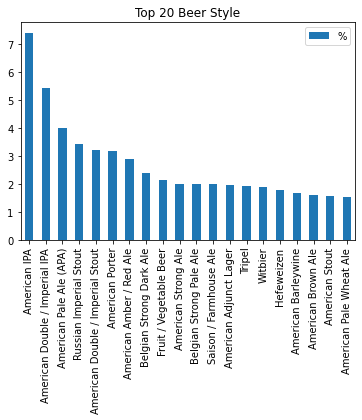

In [43]:
ax = beer_counts_20_head.plot.bar(stacked=True, title='Top 20 Beer Style')

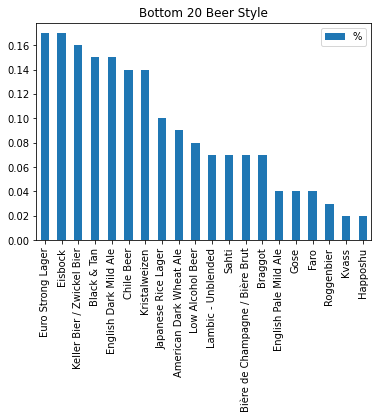

In [44]:
ax = beer_counts_20_tail.plot.bar(stacked=True, title='Bottom 20 Beer Style')

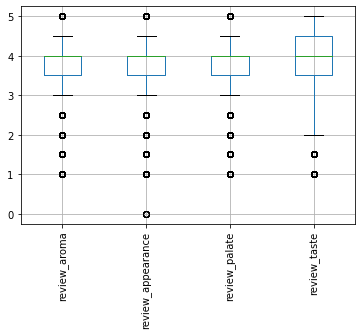

In [53]:
boxplot = df_cleaned.boxplot(column=num_cols, rot=90)

In [9]:
#Instantiate SC
sc = StandardScaler()
#Scale numerics
df_cleaned[num_cols] = sc.fit_transform(df_cleaned[num_cols])


#scale Cat
X_cat = df_cleaned[cat_cols].astype('category')
df_cleaned.drop(cat_cols, axis=1, inplace=True)
ode = OrdinalEncoder()
X_cat_y = pd.DataFrame(ode.fit_transform(df_cleaned[y_cat_cols]))
X_cat_y.columns = y_cat_cols
df_cleaned.drop(y_cat_cols, axis=1, inplace=True)
X_cat_cols = pd.concat([X_cat, X_cat_y ], axis=1)

#recombine as X
X = pd.concat([df_cleaned, X_cat_cols ], axis=1)

<ipython-input-9-0809f0afddad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[num_cols] = sc.fit_transform(df_cleaned[num_cols])
c:\users\angus\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
c:\users\angus\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [10]:
### Train test split, change to numpy

train_data_target = X.pop('beer_style')

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X.to_numpy(), train_data_target.to_numpy(), test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


In [11]:
# Save Sets
np.save(f'../data/processed/X_train', x_train)
np.save(f'../data/processed/X_val',   x_val)
np.save(f'../data/processed/X_test',  x_test)
np.save(f'../data/processed/y_train', y_train)
np.save(f'../data/processed/y_val',   y_val)
np.save(f'../data/processed/y_test',  y_test)